In [1]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_uppert_60_q3.csv").drop(
    columns=["ID", "DATE_MATCH", "TEAM_HOME", "TEAM_AWAY", "LEAGUE_INGLATERRA", "Unnamed: 0",
            "FAVOURITE_IS_HOME", "LEAGUE_ALEMANIA", "FAVOURITE_IS_AWAY", "LEAGUE_FRANCIA", "LEAGUE_ITALIA",
            "NUM_SAVESAWAY_L45", "AVG_CORNERSAWAY2_L3", "CORNERS_H_45_60", "CORNERS_DANGATTACKS_L45", "CORNERS_A",
            "TEMPERATURE", "NUM_DANGATTACKSAWAY_L45", "NUM_DANGATTACKSHOME_L45", "NUM_FOULSAWAY_L45", "NUM_ATTACKSHOME_L45",
            "NUM_TACKLEHOME_L45", "POSESSION_AWAY_L45", "IS_FAVOURITE_DRAWING", "SUM_GOALS_L60", "AVG_CORNERS_LOSE_AWAY",
            "AVG_CORNERSAWAYR2_L5", "AVG_CORNERSHOME2_L3","AVG_CORNERSHOMER2_L5","CORNERS_A_45_60","AVG_CORNERSHOME1_L3",
            "AVG_CORNERSHOME2_L5", "AVG_CORNERSAWAYR1_L3", "LEAGUE_ESPANA", "GOALS_A",
            "NUM_MATCHESAWAY_POSITIVE_L5", "NUM_SHOTSHOME_L45","WIND","RAIN"], 
    axis=1)

data = data[data.TOTAL_CORNERS<9].drop(columns=["TOTAL_CORNERS"],axis=1)

tablon = data[data.YEARMONTH<202109].drop(columns=["YEARMONTH"],axis=1)


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)].drop(columns=["YEARMONTH"],axis=1)
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111].drop(columns=["YEARMONTH"],axis=1)
y_validation_november = X_validation_november.pop("output")

In [4]:
len_test = int(round(len(tablon)*0.2, 0))
len_train = int(round(len(tablon)*0.8, 0))

X_train = tablon[len_test:]
y_train = X_train.pop("output")
X_test = tablon[:len_test]
y_test = X_test.pop("output")

In [5]:
X_train.shape, X_test.shape, X_validation.shape

((7843, 56), (1961, 56), (346, 56))

In [6]:
y_train.value_counts()

0    4826
1    3017
Name: output, dtype: int64

In [7]:
y_test.value_counts()

0    1135
1     826
Name: output, dtype: int64

In [8]:
y_validation.value_counts()

0    230
1    116
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [9]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=130, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.59241	validation_0-logloss:0.69185	validation_0-error:0.42631
[1]	validation_0-auc:0.59669	validation_0-logloss:0.69060	validation_0-error:0.42121
[2]	validation_0-auc:0.59760	validation_0-logloss:0.68937	validation_0-error:0.42121
[3]	validation_0-auc:0.59576	validation_0-logloss:0.68817	validation_0-error:0.41968
[4]	validation_0-auc:0.59996	validation_0-logloss:0.68701	validation_0-error:0.41713
[5]	validation_0-auc:0.60235	validation_0-logloss:0.68586	validation_0-error:0.41815
[6]	validation_0-auc:0.60517	validation_0-logloss:0.68479	validation_0-error:0.42172
[7]	validation_0-auc:0.61053	validation_0-logloss:0.68366	validation_0-error:0.42172
[8]	validation_0-auc:0.61131	validation_0-logloss:0.68264	validation_0-error:0.42070
[9]	validation_0-auc:0.61328	validation_0-logloss:0.68167	validation_0-error:0.42121
[10]	validation_0-auc:0.61630	validation_0-logloss:0.68065	validation_0-error:0.42070


/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11]	validation_0-auc:0.61687	validation_0-logloss:0.67970	validation_0-error:0.41917
[12]	validation_0-auc:0.61751	validation_0-logloss:0.67875	validation_0-error:0.42274
[13]	validation_0-auc:0.61650	validation_0-logloss:0.67785	validation_0-error:0.41968
[14]	validation_0-auc:0.61654	validation_0-logloss:0.67696	validation_0-error:0.41866
[15]	validation_0-auc:0.61609	validation_0-logloss:0.67612	validation_0-error:0.41917
[16]	validation_0-auc:0.61592	validation_0-logloss:0.67531	validation_0-error:0.41815
[17]	validation_0-auc:0.61642	validation_0-logloss:0.67449	validation_0-error:0.41713
[18]	validation_0-auc:0.61748	validation_0-logloss:0.67368	validation_0-error:0.41764
[19]	validation_0-auc:0.61746	validation_0-logloss:0.67290	validation_0-error:0.41866
[20]	validation_0-auc:0.61689	validation_0-logloss:0.67221	validation_0-error:0.42019
[21]	validation_0-auc:0.61736	validation_0-logloss:0.67151	validation_0-error:0.41866
[22]	validation_0-auc:0.61789	validation_0-logloss:0.6

[107]	validation_0-auc:0.62166	validation_0-logloss:0.64919	validation_0-error:0.41203
[108]	validation_0-auc:0.62159	validation_0-logloss:0.64915	validation_0-error:0.41254
[109]	validation_0-auc:0.62145	validation_0-logloss:0.64914	validation_0-error:0.41407
[110]	validation_0-auc:0.62137	validation_0-logloss:0.64912	validation_0-error:0.41357
[111]	validation_0-auc:0.62132	validation_0-logloss:0.64907	validation_0-error:0.41458
[112]	validation_0-auc:0.62172	validation_0-logloss:0.64899	validation_0-error:0.41560
[113]	validation_0-auc:0.62161	validation_0-logloss:0.64898	validation_0-error:0.41611
[114]	validation_0-auc:0.62128	validation_0-logloss:0.64898	validation_0-error:0.41560
[115]	validation_0-auc:0.62140	validation_0-logloss:0.64894	validation_0-error:0.41509
[116]	validation_0-auc:0.62128	validation_0-logloss:0.64890	validation_0-error:0.41357
[117]	validation_0-auc:0.62132	validation_0-logloss:0.64887	validation_0-error:0.41458
[118]	validation_0-auc:0.62153	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

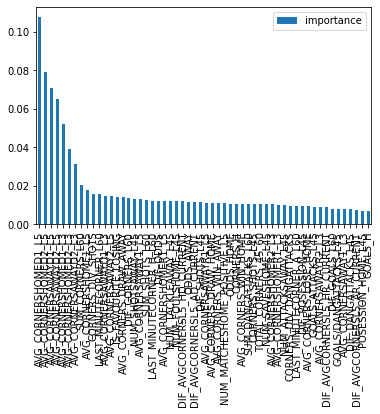

In [10]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [11]:
y_pred1 = model.predict(X_test)
confusion_matrix(y_test, y_pred1)

array([[1054,   81],
       [ 729,   97]])

In [12]:
y_pred_proba = model.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba < 0.4, 0, 1)
cm1 = confusion_matrix(y_test, predict_mine)

In [13]:
cm1

array([[404, 731],
       [152, 674]])

In [14]:
metrics.accuracy_score(y_test, y_pred1)

0.5869454360020397

In [15]:
cm1[0][0]/(cm1[0][0]+cm1[1][0])

0.7266187050359713

In [16]:
(cm1[0][0]+cm1[1][0])/len(y_test)*100

28.35288118306986

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [17]:
y_pred = model.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[222,   8],
       [105,  11]])

In [18]:
metrics.accuracy_score(y_validation, y_pred)

0.6734104046242775

In [19]:
y_pred_proba = model.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba < 0.4, 0, 1)
cm1 = confusion_matrix(y_validation, predict_mine)

In [20]:
cm1[0][0]/(cm1[0][0]+cm1[1][0])

0.8064516129032258

In [21]:
(cm1[0][0]+cm1[1][0])/len(y_validation)*100

26.878612716763005

In [22]:
cm1

array([[ 75, 155],
       [ 18,  98]])

## FINAL VALIDATION - NOVEMBER 2021

In [23]:
y_pred = model.predict(X_validation_november)
confusion_matrix(y_validation_november, y_pred)

array([[119,   7],
       [ 71,   5]])

In [24]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6138613861386139

In [25]:
y_pred_proba = model.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba < 0.4, 0, 1)
cm1 = confusion_matrix(y_validation_november, predict_mine)

In [26]:
cm1

array([[41, 85],
       [10, 66]])

In [27]:
cm1[0][0]/(cm1[0][0]+cm1[1][0])

0.803921568627451

In [28]:
(cm1[0][0]+cm1[1][0])/len(y_validation_november)*100

25.247524752475247

In [29]:
#umbral --> 0.58; Condition --> TOTAL_CORNERS > 3
import pickle
file_name = "model_under4_60_v2.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [303]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [307]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 0 if x<0.401 else 1)

In [308]:
output[output.PROB_CORNERS==0]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
13,S0oXCjk1,0,4,0,4,0
37,4Y8aXZPg,0,4,0,4,0
81,Y54DQS1n,0,0,4,4,0
